The first step to a transformer is to add encodings, embeddings to a text, we perform postional encodings to texts before feeding into the encoder.

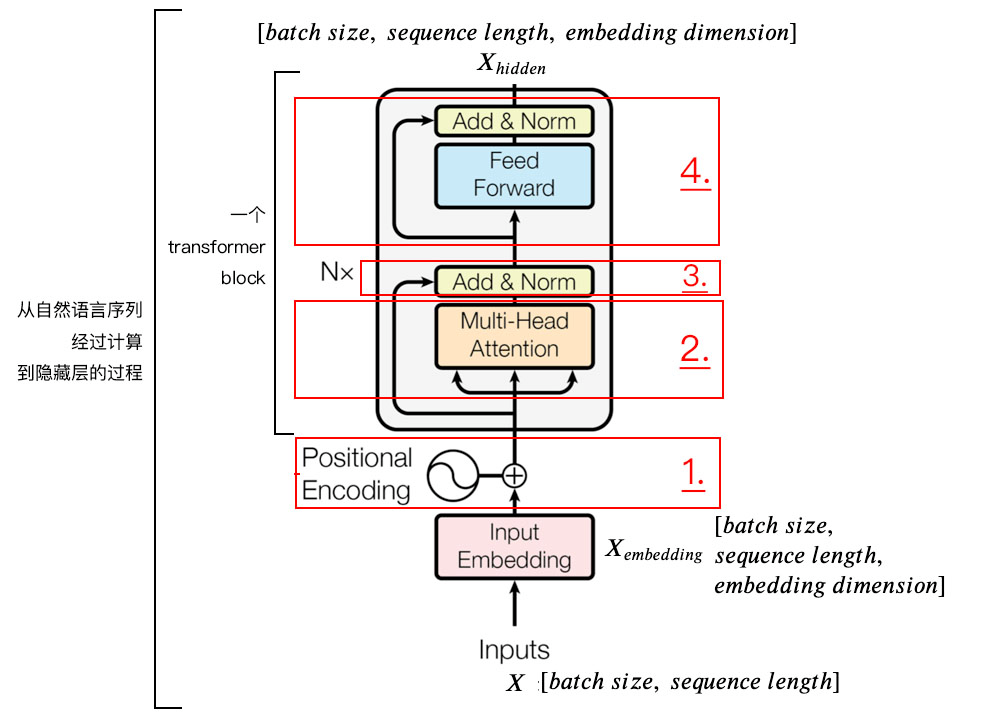

In [75]:
!pip install gensim==3.8.3
import torch
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [76]:
import math
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize 
import gensim 
from gensim.models import Word2Vec 
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings(action = 'ignore') 


dprint=0 # prints outputs if set to 1, default=0

#‘text.txt’ file 
sample = open("text.txt", "r") 
s = sample.read() 
print(s)

The black cat sat on the couch and the brown dog slept on the rug.The cat did not cross the street because it was too wet.The dog sat on the couch near the rug.The black cat sat on the couch and the brown dog slept on the rug.The cat did not cross the street because it was too wet.The dog sat on the couch near the rug.
The black cat sat on the couch and the brown dog slept on the rug.The cat did not cross the street because it was too wet.The dog sat on the couch near the rug.
The black cat sat on the couch and the brown dog slept on the rug.The cat did not cross the street because it was too wet.The dog sat on the couch near the rug.
The black cat sat on the couch and the brown dog slept on the rug.The cat did not cross the street because it was too wet.The dog sat on the couch near the rug.
The black cat sat on the couch and the brown dog slept on the rug.The cat did not cross the street because it was too wet.The dog sat on the couch near the rug.
The black cat sat on the couch and 

In [77]:
# processing escape characters 
f = s.replace("\n", " ") 
f

'The black cat sat on the couch and the brown dog slept on the rug.The cat did not cross the street because it was too wet.The dog sat on the couch near the rug.The black cat sat on the couch and the brown dog slept on the rug.The cat did not cross the street because it was too wet.The dog sat on the couch near the rug. The black cat sat on the couch and the brown dog slept on the rug.The cat did not cross the street because it was too wet.The dog sat on the couch near the rug. The black cat sat on the couch and the brown dog slept on the rug.The cat did not cross the street because it was too wet.The dog sat on the couch near the rug. The black cat sat on the couch and the brown dog slept on the rug.The cat did not cross the street because it was too wet.The dog sat on the couch near the rug. The black cat sat on the couch and the brown dog slept on the rug.The cat did not cross the street because it was too wet.The dog sat on the couch near the rug. The black cat sat on the couch and

In [81]:

data = [] 

# sentence parsing 
for i in sent_tokenize(f): 
  temp = [] 
	# tokenize the sentence into words 
  for j in word_tokenize(i): 
    temp.append(j.lower()) 
  data.append(temp) 
data[:10]

[['the',
  'black',
  'cat',
  'sat',
  'on',
  'the',
  'couch',
  'and',
  'the',
  'brown',
  'dog',
  'slept',
  'on',
  'the',
  'rug.the',
  'cat',
  'did',
  'not',
  'cross',
  'the',
  'street',
  'because',
  'it',
  'was',
  'too',
  'wet.the',
  'dog',
  'sat',
  'on',
  'the',
  'couch',
  'near',
  'the',
  'rug.the',
  'black',
  'cat',
  'sat',
  'on',
  'the',
  'couch',
  'and',
  'the',
  'brown',
  'dog',
  'slept',
  'on',
  'the',
  'rug.the',
  'cat',
  'did',
  'not',
  'cross',
  'the',
  'street',
  'because',
  'it',
  'was',
  'too',
  'wet.the',
  'dog',
  'sat',
  'on',
  'the',
  'couch',
  'near',
  'the',
  'rug',
  '.'],
 ['the',
  'black',
  'cat',
  'sat',
  'on',
  'the',
  'couch',
  'and',
  'the',
  'brown',
  'dog',
  'slept',
  'on',
  'the',
  'rug.the',
  'cat',
  'did',
  'not',
  'cross',
  'the',
  'street',
  'because',
  'it',
  'was',
  'too',
  'wet.the',
  'dog',
  'sat',
  'on',
  'the',
  'couch',
  'near',
  'the',
  'rug',
  '.'],

In [ ]:
# Creating Skip Gram model 
#model2 = gensim.models.Word2Vec(data, min_count = 1, size = 512,window = 5, sg = 1) 
#model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 512,window = 5, sg = 1)

In [ ]:
model2

#word embeddings

In [82]:
# 1-The 2-black 3-cat 4-sat 5-on 6-the 7-couch 8-and 9-the 10-brown 11-dog 12-slept 13-on 14-the 15-rug.
word1='black'
word2='brown'
pos1=2
pos2=10
a=model2[word1]
b=model2[word2]

In [83]:
print(len(a))

512


In [84]:
print(b)

[ 0.0305233   0.02198762  0.00697343 -0.01773169  0.09589173  0.01267418
 -0.02509775  0.00627299 -0.01390397  0.02949129 -0.07516373  0.04111062
 -0.03762512  0.02788524  0.02975576  0.03509551 -0.04953919 -0.01359119
 -0.00279329 -0.04549393  0.07886837 -0.11356815  0.07568879  0.05257439
  0.09004562 -0.11795767  0.01608316  0.04462176  0.02944139 -0.00156855
  0.00545895 -0.06991858  0.01030332  0.06076585 -0.03057746  0.02186638
 -0.05616793 -0.03076739 -0.05641836 -0.095094    0.00129656  0.03910135
  0.1307186  -0.00121387 -0.04420945  0.0826899  -0.03652396  0.05569729
 -0.04498211 -0.00785675  0.05987936 -0.0527639  -0.03608897  0.00858408
 -0.03981213  0.07392243 -0.10734627  0.08657303  0.01919036 -0.06211161
 -0.1041188  -0.05591354 -0.01128272 -0.01304153  0.01748054  0.0521426
  0.03246628 -0.03509603  0.07044996 -0.02959081 -0.06757629  0.03370206
  0.04152949  0.03370135  0.04140696  0.029701    0.0081687  -0.01730534
  0.01708407 -0.12236515 -0.0201751   0.00640535  0.

In [85]:
if(dprint==1):
        print(a)

# compute cosine similarity
dot = np.dot(a, b)
norma = np.linalg.norm(a)
normb = np.linalg.norm(b)
cos = dot / (norma * normb)
print(dot)

1.404261


In [86]:
print(norma)

1.1847606


In [87]:
print(normb)

1.1854208


In [88]:
print(cos)

0.9998727


In [89]:
aa = a.reshape(1,512) 
ba = b.reshape(1,512)
cos_lib = cosine_similarity(aa, ba)

In [90]:
print(a.shape)
print(aa.shape)

(512,)
(1, 512)




A Positional Encoding example using one line of basic Python using a few lines of code for the sine and cosine functions. I added a Pytorch method inspired by Pytorch.org to explore these methods. The main idea to keep in mind is that we are looking to add small values to the word embedding output so that the positions are taken into account. This means that as long as the cosine similarity, for example, displayed at the end of the notebook, shows the positions have been taken into account, the method can apply. Depending on the Transformer model, this method can be fine-tuned as well as using other methods.


In [91]:
pe1=aa.copy()
pe2=aa.copy()
pe3=aa.copy()
paa=aa.copy()
pba=ba.copy()
d_model=512
max_print=d_model
max_length=20

pe1.shape

(1, 512)

#positional vectors

In [92]:
for i in range(0, max_print,2):
                pe1[0][i] = math.sin(pos1 / (10000 ** ((2 * i)/d_model)))
                paa[0][i] = (paa[0][i]*math.sqrt(d_model))+ pe1[0][i]
                pe1[0][i+1] = math.cos(pos1 / (10000 ** ((2 * i)/d_model)))
                paa[0][i+1] = (paa[0][i+1]*math.sqrt(d_model))+pe1[0][i+1]
                if dprint==1:
                        print(i,pe1[0][i],i+1,pe1[0][i+1])
                        print(i,paa[0][i],i+1,paa[0][i+1])
                        print("\n")

In [ ]:
print(pe1)

[[ 9.09297407e-01 -4.16146845e-01  9.58144367e-01 -2.86285430e-01
   9.87046242e-01 -1.60435960e-01  9.99164224e-01 -4.08766568e-02
   9.97479975e-01  7.09482506e-02  9.84703004e-01  1.74241230e-01
   9.63226616e-01  2.68690288e-01  9.35118318e-01  3.54335666e-01
   9.02130723e-01  4.31462824e-01  8.65725577e-01  5.00518918e-01
   8.27103794e-01  5.62049210e-01  7.87237823e-01  6.16649508e-01
   7.46903539e-01  6.64932430e-01  7.06710517e-01  7.07502782e-01
   6.67129099e-01  7.44942129e-01  6.28514349e-01  7.77797997e-01
   5.91127098e-01  8.06578398e-01  5.55151761e-01  8.31749082e-01
   5.20711303e-01  8.53732824e-01  4.87879932e-01  8.72910738e-01
   4.56693351e-01  8.89624178e-01  4.27157611e-01  9.04177189e-01
   3.99255812e-01  9.16839600e-01  3.72953892e-01  9.27849889e-01
   3.48205268e-01  9.37418282e-01  3.24954301e-01  9.45729733e-01
   3.03139359e-01  9.52946246e-01  2.82694966e-01  9.59209859e-01
   2.63553679e-01  9.64644730e-01  2.45647445e-01  9.69359219e-01
   2.28908

#positional encodings

In [93]:
# A  method in Pytorch using torch.exp and math.log :
max_len=max_length                
pe = torch.zeros(max_len, d_model)
print(pe.shape)

position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
print(position.shape)
div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
pe[:, 0::2] = torch.sin(position * div_term)
pe[:, 1::2] = torch.cos(position * div_term)
print(pe[:, 0::2])

torch.Size([20, 512])
torch.Size([20, 1])
tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 8.4147e-01,  8.2186e-01,  8.0196e-01,  ...,  1.1140e-04,
          1.0746e-04,  1.0366e-04],
        [ 9.0930e-01,  9.3641e-01,  9.5814e-01,  ...,  2.2279e-04,
          2.1492e-04,  2.0733e-04],
        ...,
        [-9.6140e-01, -6.3753e-01, -1.1153e-01,  ...,  1.8938e-03,
          1.8268e-03,  1.7623e-03],
        [-7.5099e-01, -9.9638e-01, -8.6358e-01,  ...,  2.0052e-03,
          1.9343e-03,  1.8659e-03],
        [ 1.4988e-01, -4.9773e-01, -9.2024e-01,  ...,  2.1165e-03,
          2.0418e-03,  1.9696e-03]])


#adding postional encoding to the embedding vectors

we directly cannot add the two vectors as they can result in a loss of information in the embedding vectors, so we go with this technique as shown below

In [94]:
for i in range(0, max_print,2):
                pe2[0][i] = math.sin(pos2 / (10000 ** ((2 * i)/d_model)))
                pba[0][i] = (pba[0][i]*math.sqrt(d_model))+ pe2[0][i]
            
                pe2[0][i+1] = math.cos(pos2 / (10000 ** ((2 * i)/d_model)))
                pba[0][i+1] = (pba[0][i+1]*math.sqrt(d_model))+ pe2[0][i+1]
               
                if dprint==1:
                        print(i,pe2[0][i],i+1,pe2[0][i+1])
                        print(i,paa[0][i],i+1,paa[0][i+1])
                        print("\n")

print(word1,word2)
cos_lib = cosine_similarity(aa, ba)
print(cos_lib,"word similarity")
cos_lib = cosine_similarity(pe1, pe2)
print(cos_lib,"positional similarity")
cos_lib = cosine_similarity(paa, pba)
print(cos_lib,"positional encoding similarity")

if dprint==1:
        print(word1)
        print("embedding")
        print(aa)
        print("positional encoding")
        print(pe1)
        print("encoded embedding")
        print(paa)

        print(word2)
        print("embedding")
        print(ba)
        print("positional encoding")
        print(pe2)
        print("encoded embedding")
        print(pba)



black brown
[[0.9998729]] word similarity
[[0.8600013]] positional similarity
[[0.9623914]] positional encoding similarity


the positional encoding of each word now contains the initial word embedding information and positional encoding values

hugging face and other libraries provide this solutions , so we dont have to do this manually while training our model.